# Memprediksi pada level apa seseorang terkena obesitas berdasarkan kebiasaan makan dan kondisi fisik

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

## Import Data

In [2]:
dataset = pd.read_csv('ObesityDataSet.csv')
dataset

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


## Data Exploration

In [3]:
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


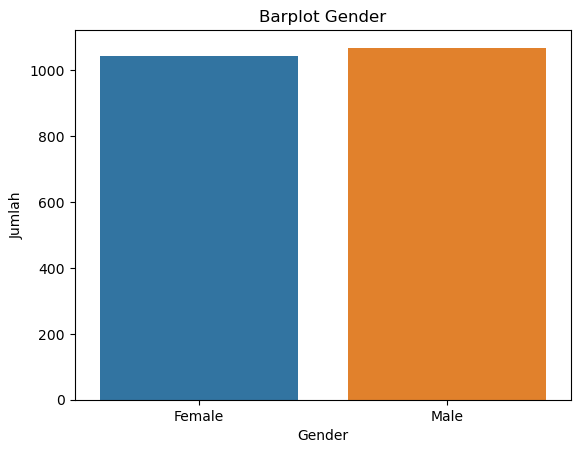

In [4]:
sns.countplot(x="Gender", data = dataset)
 
plt.xlabel("Gender")
plt.ylabel("Jumlah")
plt.title("Barplot Gender")
plt.show()

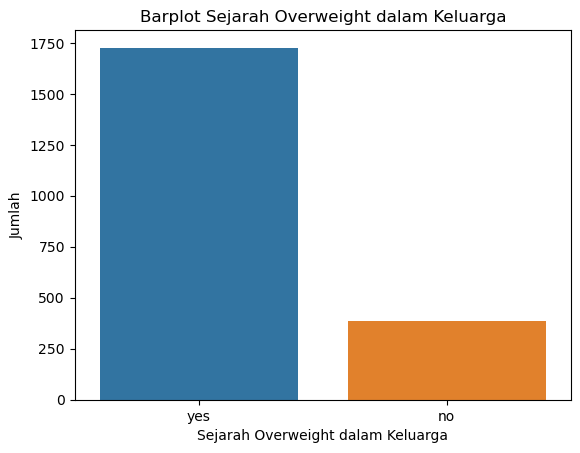

In [5]:
sns.countplot(x="family_history_with_overweight", data = dataset)
 
plt.xlabel("Sejarah Overweight dalam Keluarga")
plt.ylabel("Jumlah")
plt.title("Barplot Sejarah Overweight dalam Keluarga")
plt.show()

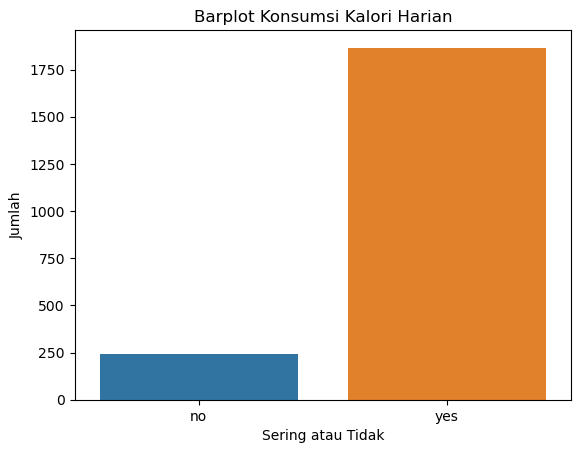

In [6]:
sns.countplot(x="FAVC", data = dataset)

plt.xlabel("Sering atau Tidak")
plt.ylabel("Jumlah")
plt.title("Barplot Konsumsi Kalori Harian")
plt.show()

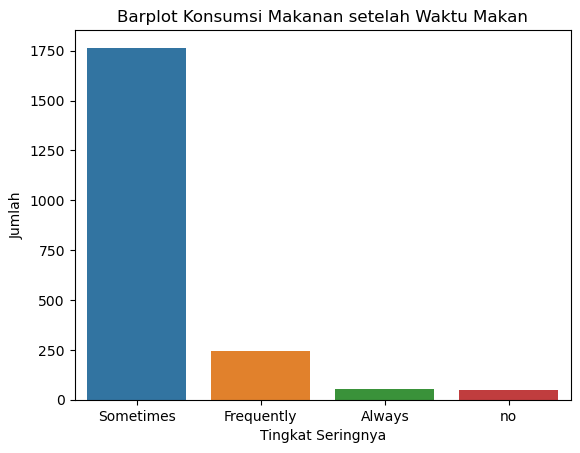

In [7]:
sns.countplot(x="CAEC", data = dataset)

plt.xlabel("Tingkat Seringnya")
plt.ylabel("Jumlah")
plt.title("Barplot Konsumsi Makanan setelah Waktu Makan")
plt.show()

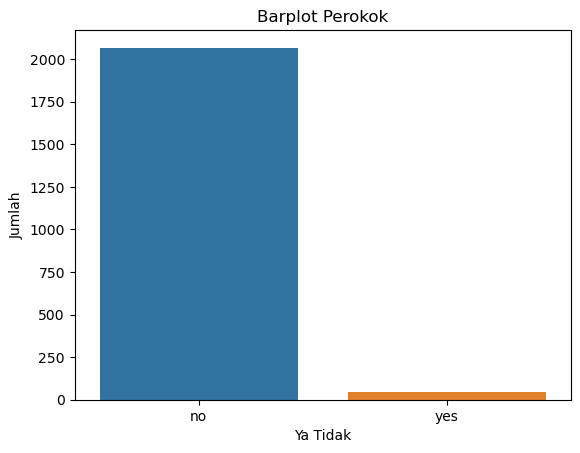

In [8]:
sns.countplot(x="SMOKE", data = dataset)
 
plt.xlabel("Ya Tidak")
plt.ylabel("Jumlah")
plt.title("Barplot Perokok")
plt.show()

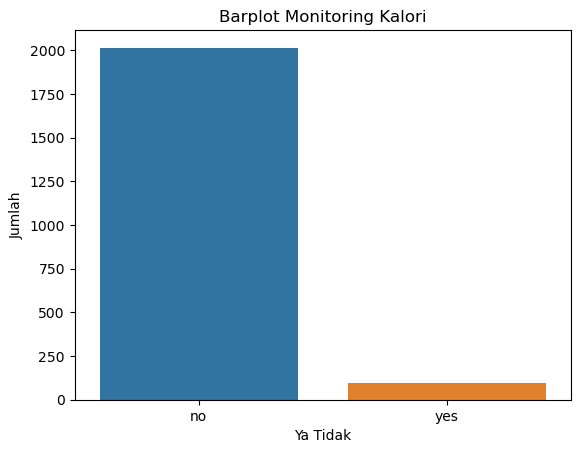

In [9]:
sns.countplot(x="SCC", data = dataset)
 
plt.xlabel("Ya Tidak")
plt.ylabel("Jumlah")
plt.title("Barplot Monitoring Kalori")
plt.show()

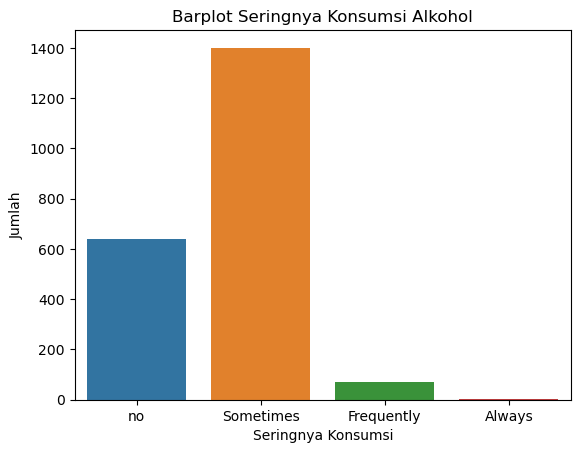

In [10]:
sns.countplot(x="CALC", data = dataset)
 
plt.xlabel("Seringnya Konsumsi")
plt.ylabel("Jumlah")
plt.title("Barplot Seringnya Konsumsi Alkohol")
plt.show()

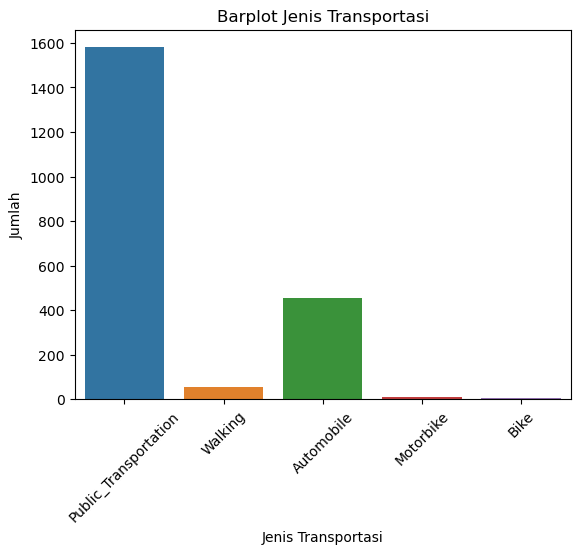

In [11]:
sns.countplot(x="MTRANS", data = dataset)
 
plt.xlabel("Jenis Transportasi")
plt.ylabel("Jumlah")
plt.title("Barplot Jenis Transportasi")
plt.xticks(rotation = 45)
plt.show()

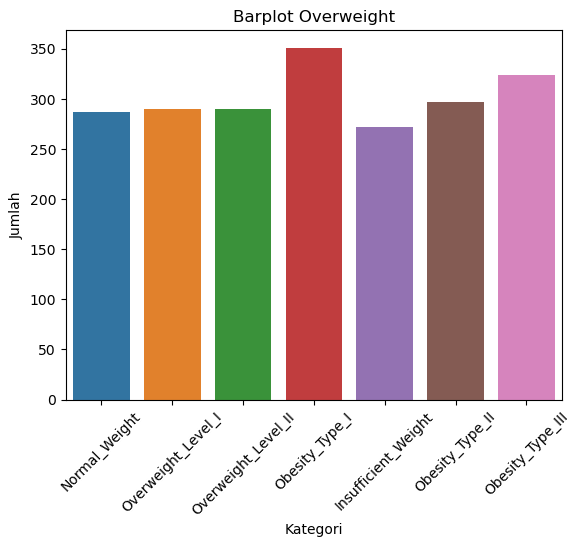

In [12]:
sns.countplot(x="NObeyesdad", data = dataset)
 
plt.xlabel("Kategori")
plt.ylabel("Jumlah")
plt.title("Barplot Overweight")
plt.xticks(rotation = 45)
plt.show()

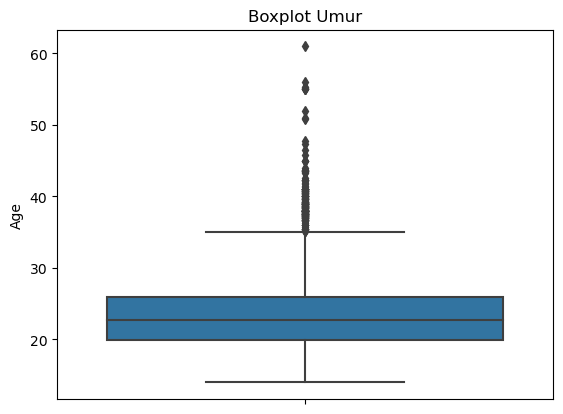

In [13]:
sns.boxplot(y="Age", data = dataset)

plt.title("Boxplot Umur")
plt.show()

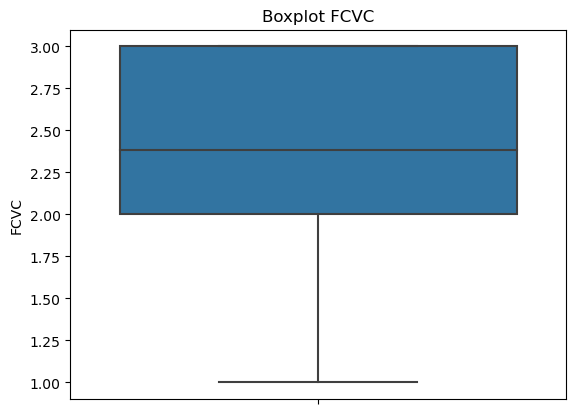

In [14]:
sns.boxplot(y="FCVC", data = dataset)

plt.title("Boxplot FCVC")
plt.show()

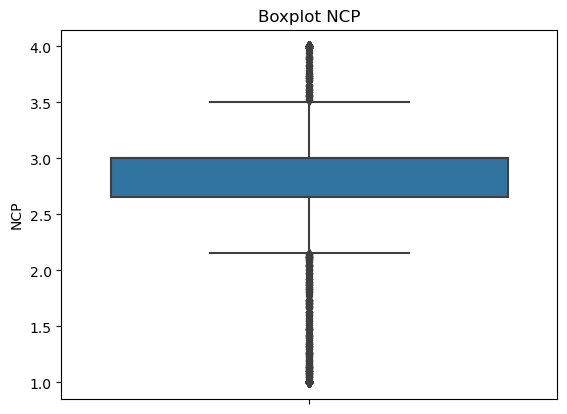

In [15]:
sns.boxplot(y="NCP", data = dataset)

plt.title("Boxplot NCP")
plt.show()

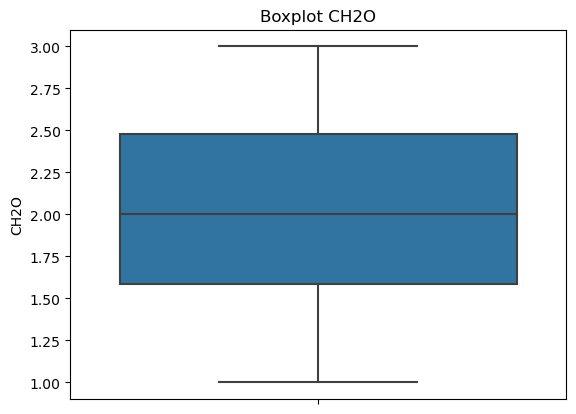

In [16]:
sns.boxplot(y="CH2O", data = dataset)

plt.title("Boxplot CH2O")
plt.show()

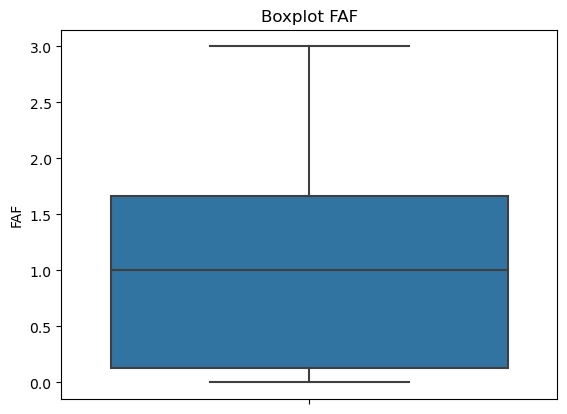

In [17]:
sns.boxplot(y="FAF", data = dataset)

plt.title("Boxplot FAF")
plt.show()

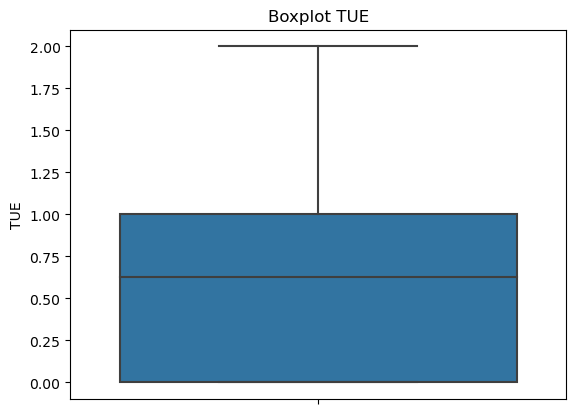

In [18]:
sns.boxplot(y="TUE", data = dataset)

plt.title("Boxplot TUE")
plt.show()

## Data Preparation

### Data Cleansing

In [19]:
dataset.drop('Height', axis = 1, inplace = True)
dataset.drop('Weight', axis = 1, inplace = True)

### Konversi Data

In [20]:
dataset.loc[dataset["Gender"] == "Male", "Gender"] = 1
dataset.loc[dataset["Gender"] == "Female", "Gender"] = 0
dataset['Gender'] = dataset.Gender.astype('category')

dataset.loc[dataset["family_history_with_overweight"] == "yes", "family_history_with_overweight"] = 1
dataset.loc[dataset["family_history_with_overweight"] == "no", "family_history_with_overweight"] = 0
dataset['family_history_with_overweight'] = dataset.family_history_with_overweight.astype('category')

dataset.loc[dataset["FAVC"] == "yes", "FAVC"] = 1
dataset.loc[dataset["FAVC"] == "no", "FAVC"] = 0
dataset['FAVC'] = dataset.FAVC.astype('category')

dataset.loc[dataset["CAEC"] == "Always", "CAEC"] = 3
dataset.loc[dataset["CAEC"] == "Frequently", "CAEC"] = 2
dataset.loc[dataset["CAEC"] == "Sometimes", "CAEC"] = 1
dataset.loc[dataset["CAEC"] == "no", "CAEC"] = 0
dataset['CAEC'] = dataset.CAEC.astype('category')

dataset.loc[dataset["SMOKE"] == "yes", "SMOKE"] = 1
dataset.loc[dataset["SMOKE"] == "no", "SMOKE"] = 0
dataset['SMOKE'] = dataset.SMOKE.astype('category')

dataset.loc[dataset["SCC"] == "yes", "SCC"] = 1
dataset.loc[dataset["SCC"] == "no", "SCC"] = 0
dataset['SCC'] = dataset.SCC.astype('category')

dataset.loc[dataset["CALC"] == "Always", "CALC"] = 3
dataset.loc[dataset["CALC"] == "Frequently", "CALC"] = 2
dataset.loc[dataset["CALC"] == "Sometimes", "CALC"] = 1
dataset.loc[dataset["CALC"] == "no", "CALC"] = 0
dataset['CALC'] = dataset.CALC.astype('category')

dataset.loc[dataset["MTRANS"] == "Automobile", "MTRANS"] = 4
dataset.loc[dataset["MTRANS"] == "Motorbike", "MTRANS"] = 3
dataset.loc[dataset["MTRANS"] == "Bike", "MTRANS"] = 2
dataset.loc[dataset["MTRANS"] == "Public_Transportation", "MTRANS"] = 1
dataset.loc[dataset["MTRANS"] == "Walking", "MTRANS"] = 0
dataset['MTRANS'] = dataset.MTRANS.astype('category')

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Gender                          2111 non-null   category
 1   Age                             2111 non-null   float64 
 2   family_history_with_overweight  2111 non-null   category
 3   FAVC                            2111 non-null   category
 4   FCVC                            2111 non-null   float64 
 5   NCP                             2111 non-null   float64 
 6   CAEC                            2111 non-null   category
 7   SMOKE                           2111 non-null   category
 8   CH2O                            2111 non-null   float64 
 9   SCC                             2111 non-null   category
 10  FAF                             2111 non-null   float64 
 11  TUE                             2111 non-null   float64 
 12  CALC                

In [22]:
dat = dataset.copy()
Y = dat['NObeyesdad']
X = dat.drop(columns = ['NObeyesdad'])

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

## Modelling

### Decision Tree

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = DecisionTreeClassifier()

In [25]:
grid_param={"criterion":["gini","entropy"],
             "splitter":["best","random"],
             "max_depth":range(3,21,3),
             "min_samples_leaf":[1,2,4,5],
             "min_samples_split":[2,3,5,7,9] 
            }
grid_search=GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs=-1)
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 21, 3),
                         'min_samples_leaf': [1, 2, 4, 5],
                         'min_samples_split': [2, 3, 5, 7, 9],
                         'splitter': ['best', 'random']})

In [26]:
print(grid_search.best_params_)
bestCriterion = grid_search.best_params_["criterion"]
bestMaxDepth = grid_search.best_params_["max_depth"]
bestMinSamplesLeaf = grid_search.best_params_["min_samples_leaf"]
bestMinSamplesSplit = grid_search.best_params_["min_samples_split"]
bestSplitter = grid_search.best_params_["splitter"]

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [27]:
clf=DecisionTreeClassifier(random_state=0, criterion=bestCriterion, max_depth=bestMaxDepth, min_samples_leaf=bestMinSamplesLeaf,
                           min_samples_split=bestMinSamplesSplit, splitter=bestSplitter)
clf.fit(X_train, Y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_train, Y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clf.score(X_test, Y_test)))

y_pred = clf.predict(X_test)
print(classification_report(Y_test, y_pred))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.74
                     precision    recall  f1-score   support

Insufficient_Weight       0.75      0.78      0.77        90
      Normal_Weight       0.53      0.47      0.50        87
     Obesity_Type_I       0.68      0.67      0.67       103
    Obesity_Type_II       0.89      0.94      0.92        90
   Obesity_Type_III       0.98      0.99      0.99       101
 Overweight_Level_I       0.60      0.58      0.59        81
Overweight_Level_II       0.65      0.68      0.67        82

           accuracy                           0.74       634
          macro avg       0.73      0.73      0.73       634
       weighted avg       0.73      0.74      0.74       634



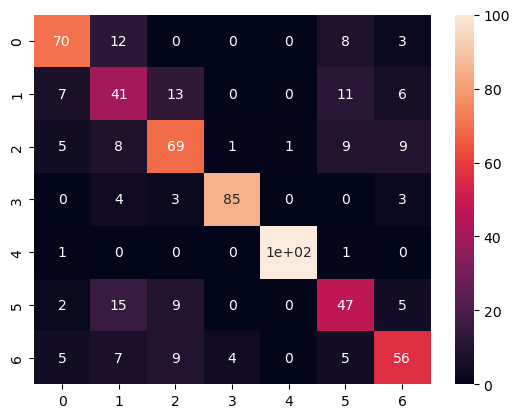

In [28]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_pred, Y_test)
sns.heatmap(cm,annot=True)
plt.show()

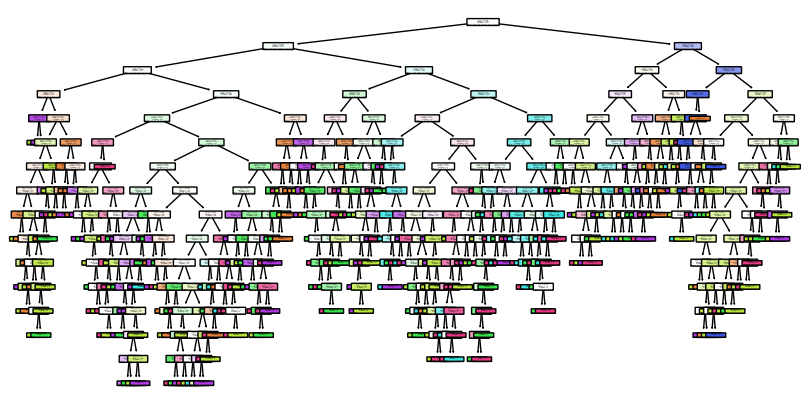

In [29]:
plt.figure(figsize=(10,5))
tree.plot_tree(clf,rounded=True,filled=True)
plt.show()

In [30]:
path=clf.cost_complexity_pruning_path(X_train,Y_train)

ccp_alphas,impurities=path.ccp_alphas,path.impurities
print("ccp alpha wil give list of values :",ccp_alphas)
print("***********************************************************")
print("Impurities in Decision Tree :",impurities)

ccp alpha wil give list of values : [0.         0.00076664 0.00090273 0.0010898  0.00109855 0.00109855
 0.00109855 0.00116499 0.00122195 0.00122195 0.00124648 0.0013541
 0.0013541  0.0013541  0.0013541  0.0013541  0.0013541  0.0013541
 0.0013541  0.0013541  0.0013541  0.0013541  0.0013541  0.0013541
 0.0013541  0.0013541  0.0013541  0.0013541  0.0013541  0.0013541
 0.0013541  0.0013541  0.0013541  0.00138243 0.00140207 0.00145004
 0.00172319 0.00186519 0.00186519 0.00186519 0.00186519 0.00186519
 0.00186519 0.00186519 0.00186519 0.00186519 0.00186519 0.00186519
 0.00186519 0.00186519 0.00186519 0.00186519 0.00186519 0.00186519
 0.00186519 0.00198674 0.00199475 0.00200799 0.00201302 0.00204531
 0.00208948 0.0021971  0.0021971  0.0021971  0.0021971  0.0021971
 0.0021971  0.0021971  0.00222543 0.00224619 0.00230973 0.00241732
 0.0024439  0.0024439  0.0024439  0.0024439  0.0024439  0.0024439
 0.0024439  0.0024439  0.00245382 0.00245953 0.00246641 0.0024814
 0.00248633 0.00250843 0.002529  

In [31]:
clfs=[] 
for ccp_alpha in ccp_alphas:
    clf=DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train,Y_train)
    clfs.append(clf)
print("Last node in Decision tree is {} and ccp_alpha for last node is {}".format(clfs[-1].tree_.node_count,ccp_alphas[-1]))

Last node in Decision tree is 1 and ccp_alpha for last node is 0.35759568282096676


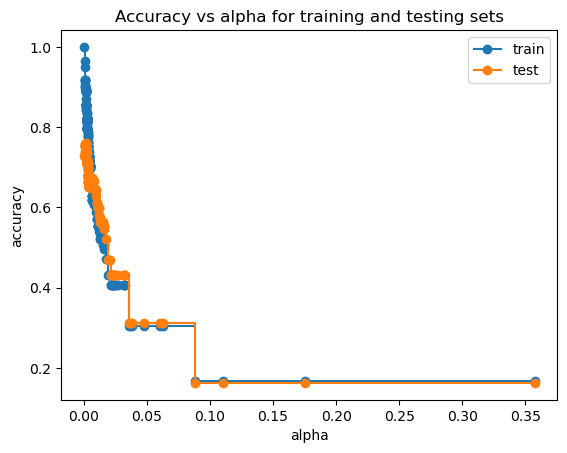

In [32]:
train_scores = [clf.score(X_train, Y_train) for clf in clfs]
test_scores = [clf.score(X_test, Y_test) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",drawstyle="steps-post")
ax.legend()
plt.show()

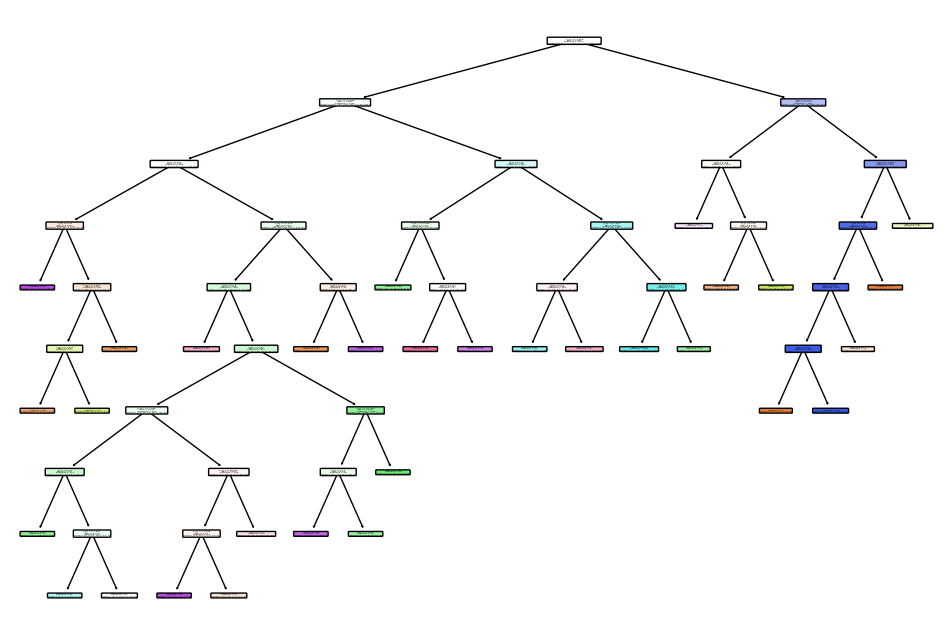

In [33]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.005)
clf.fit(X_train,Y_train)

plt.figure(figsize=(12,8))
tree.plot_tree(clf,rounded=True,filled=True)
plt.show()

In [34]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_train, Y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clf.score(X_test, Y_test)))

y_pred = clf.predict(X_test)
print(classification_report(Y_test, y_pred))

Accuracy of Decision Tree classifier on training set: 0.69
Accuracy of Decision Tree classifier on test set: 0.67
                     precision    recall  f1-score   support

Insufficient_Weight       0.73      0.68      0.70        90
      Normal_Weight       0.54      0.51      0.52        87
     Obesity_Type_I       0.57      0.68      0.62       103
    Obesity_Type_II       0.77      0.83      0.80        90
   Obesity_Type_III       0.98      0.98      0.98       101
 Overweight_Level_I       0.51      0.40      0.44        81
Overweight_Level_II       0.51      0.52      0.52        82

           accuracy                           0.67       634
          macro avg       0.66      0.66      0.65       634
       weighted avg       0.67      0.67      0.67       634



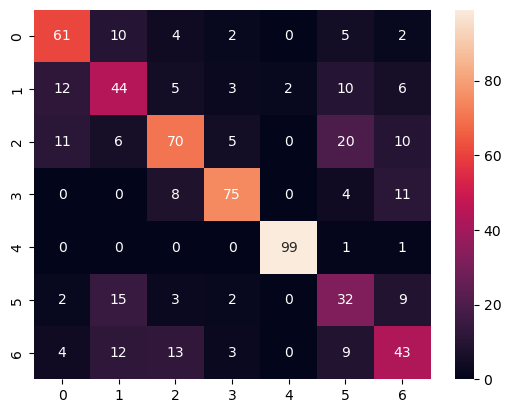

In [35]:
cm = confusion_matrix(y_pred, Y_test)
sns.heatmap(cm,annot=True)
plt.show()

### KNN (K-Nearest Neighbors)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, Y_train)))
print('Accuracy of K-NN clasifier on test set: {:.2f}'.format(knn.score(X_test, Y_test)))

y_pred = knn.predict(X_test)
print(classification_report(Y_test, y_pred))

Accuracy of K-NN classifier on training set: 0.81
Accuracy of K-NN clasifier on test set: 0.73
                     precision    recall  f1-score   support

Insufficient_Weight       0.69      0.91      0.78        90
      Normal_Weight       0.61      0.26      0.37        87
     Obesity_Type_I       0.69      0.82      0.75       103
    Obesity_Type_II       0.75      0.92      0.83        90
   Obesity_Type_III       0.88      1.00      0.94       101
 Overweight_Level_I       0.65      0.63      0.64        81
Overweight_Level_II       0.78      0.49      0.60        82

           accuracy                           0.73       634
          macro avg       0.72      0.72      0.70       634
       weighted avg       0.72      0.73      0.71       634



C:\Users\krist\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\krist\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\krist\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


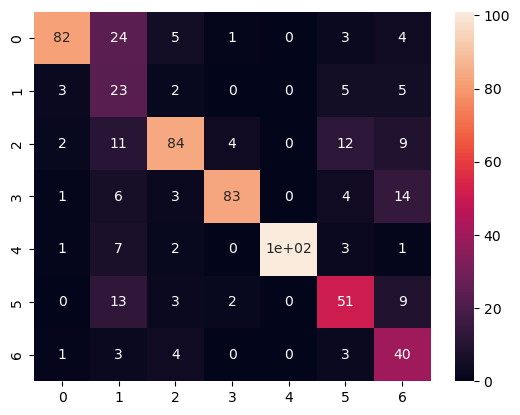

In [37]:
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_pred, Y_test)
sns.heatmap(cm,annot=True)
plt.show()

In [38]:
leaf_size = list(range(1,40,2))
n_neighbors = list(range(4,15))

hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors)

knn = KNeighborsClassifier()

clf = GridSearchCV(knn, hyperparameters, cv=10)

best_model = clf.fit(X_train,Y_train)

print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

C:\Users\krist\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\krist\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Best leaf_size: 1
Best n_neighbors: 4


C:\Users\krist\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\krist\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [39]:
knn = KNeighborsClassifier(leaf_size=best_model.best_estimator_.get_params()['leaf_size'],
                          n_neighbors=best_model.best_estimator_.get_params()['n_neighbors'])
knn.fit(X_train, Y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, Y_train)))
print('Accuracy of K-NN clasifier on test set: {:.2f}'.format(knn.score(X_test, Y_test)))

y_pred = knn.predict(X_test)
print(classification_report(Y_test, y_pred))

C:\Users\krist\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy of K-NN classifier on training set: 0.84
Accuracy of K-NN clasifier on test set: 0.75
                     precision    recall  f1-score   support

Insufficient_Weight       0.69      0.96      0.80        90
      Normal_Weight       0.60      0.28      0.38        87
     Obesity_Type_I       0.70      0.84      0.77       103
    Obesity_Type_II       0.78      0.92      0.85        90
   Obesity_Type_III       0.89      1.00      0.94       101
 Overweight_Level_I       0.69      0.64      0.67        81
Overweight_Level_II       0.83      0.52      0.64        82

           accuracy                           0.75       634
          macro avg       0.74      0.74      0.72       634
       weighted avg       0.74      0.75      0.73       634



C:\Users\krist\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\krist\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\krist\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


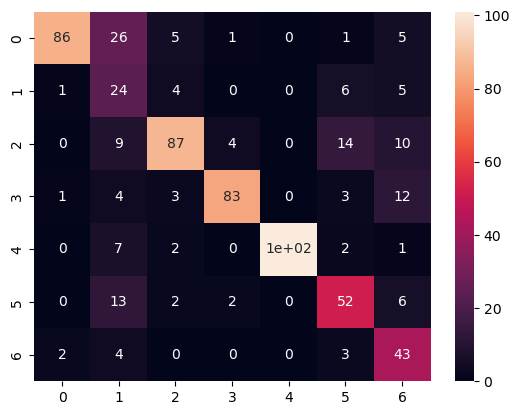

In [40]:
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_pred, Y_test)
sns.heatmap(cm,annot=True)
plt.show()

### Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, Y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'.format(gnb.score(X_train,Y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'.format(gnb.score(X_test, Y_test)))

y_pred = gnb.predict(X_test)
print(classification_report(Y_test, y_pred))

Accuracy of GNB classifier on training set: 0.44
Accuracy of GNB classifier on test set: 0.47
                     precision    recall  f1-score   support

Insufficient_Weight       0.29      0.96      0.44        90
      Normal_Weight       0.40      0.05      0.08        87
     Obesity_Type_I       0.41      0.23      0.30       103
    Obesity_Type_II       0.53      0.88      0.66        90
   Obesity_Type_III       0.99      0.99      0.99       101
 Overweight_Level_I       0.40      0.02      0.05        81
Overweight_Level_II       0.50      0.06      0.11        82

           accuracy                           0.47       634
          macro avg       0.50      0.46      0.37       634
       weighted avg       0.51      0.47      0.39       634



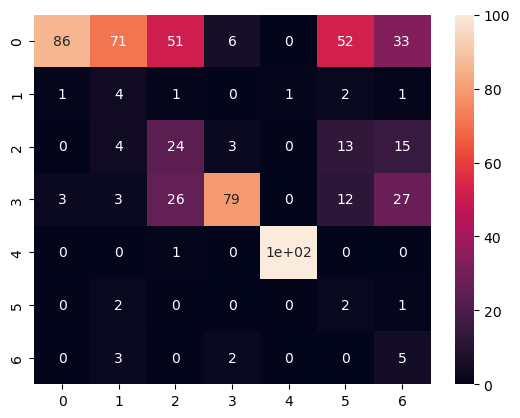

In [42]:
cm = confusion_matrix(y_pred, Y_test)
sns.heatmap(cm,annot=True)
plt.show()

In [43]:
param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=100)}

gnb_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
gnb_grid.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=0.0008111308307896872)
print(gnb_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.0008111308307896872)


In [44]:
print('Accuracy of GNB classifier on training set: {:.2f}'.format(gnb_grid.score(X_train,Y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'.format(gnb_grid.score(X_test, Y_test)))

y_pred = gnb_grid.predict(X_test)
print(classification_report(Y_test, y_pred))

Accuracy of GNB classifier on training set: 0.56
Accuracy of GNB classifier on test set: 0.56
                     precision    recall  f1-score   support

Insufficient_Weight       0.53      0.67      0.59        90
      Normal_Weight       0.53      0.29      0.37        87
     Obesity_Type_I       0.42      0.60      0.50       103
    Obesity_Type_II       0.47      0.88      0.61        90
   Obesity_Type_III       0.97      1.00      0.99       101
 Overweight_Level_I       0.58      0.19      0.28        81
Overweight_Level_II       0.50      0.18      0.27        82

           accuracy                           0.56       634
          macro avg       0.57      0.54      0.52       634
       weighted avg       0.58      0.56      0.53       634



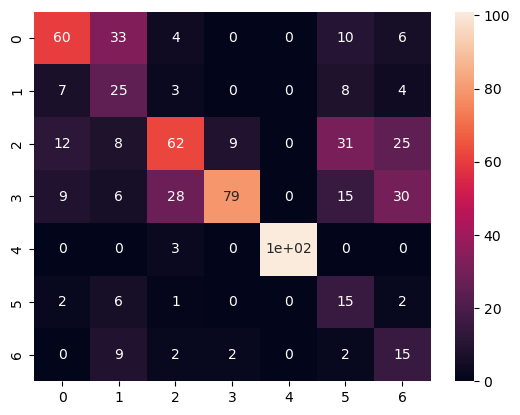

In [45]:
cm = confusion_matrix(y_pred, Y_test)
sns.heatmap(cm,annot=True)
plt.show()

## Akurasi Masing-masing Algoritma
#### Decision Tree
69%, 67%

#### KNN
84%, 75%

#### Naive Bayes
56%, 56%

Algoritma terbaik adalah menggunakan KNN, dengan akurasi training 84% dan testing 75%